# <font color ='545aa7'> Chapter 9: Simulations </font>

From **Scientific Computing for Chemists** by Charles Weiss. The document is copyright © 2021 Charles J. Weiss and is released under under the [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

**Note:** There is a random component to some of the following code, so exact results may vary.

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

## 9.1 Deterministic Simulations
### 9.1.1 Nuclear Magnetic Resonance Splitting

In [2]:
def split(peaks, n, J, freq=400):
    '''(list, int, float, freq=num) -> list
    Takes in a list of peak ppm values for a single 
    resonance(peaks),the number of identical neighboring 
    protons(n), the coupling constant (J) in Hz, and the 
    frequency of observation (freq) in MHz and returns a 
    list of ppm values for all peaks in the splitting pattern.
    '''
    # check validity of input values
    if type(peaks) != list:
        peaks = list([peaks])
    if type(n) != int:
        print('Error: n must be an integer.')
        return None
    
    # split the peak(s)
    J_ppm  = J / freq
    new_peaks = []
    for peak in peaks:
        new_peaks.extend([peak + 0.5 * J_ppm, peak - 0.5 * J_ppm])
        
    n =n - 1
    
    # perform next split or return result
    if n > 0:
        return split(new_peaks, n, J, freq=freq)
    else:
        return new_peaks

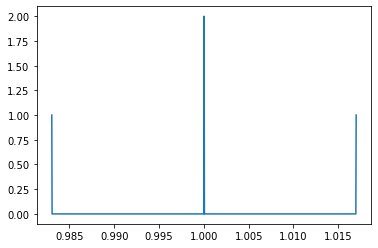

In [3]:
signal, ppm = np.histogram(split([1.00], 2, J=6.8), bins=1000)
plt.plot(ppm[1:], signal)

Text(0.5, 0, 'Chemical Shift, ppm')

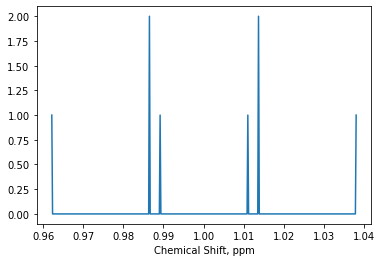

In [4]:
signal, ppm = np.histogram(split(split([1.00], 1,  J=10.8), 2, J=9.8), bins=400)
plt.plot(ppm[1:], signal)
plt.xlabel('Chemical Shift, ppm')

### 9.1.2 Single-Step Stepwise Chemical Kinetics

In [5]:
A, P = 1.00, 0.00 # molarity, M
k = 0.05 # 1/s for a first-order reaction 
length = 100  # length of simulation in seconds 
time = range(length + 1)

# create arrays to hold calculated concentrations
A_conc = np.empty(length + 1)
P_conc = np.empty(length + 1)
# simulation
for sec in time:
    # record concentration
    A_conc[sec] = A
    P_conc[sec] = P
    # calculate rate
    rate = k * A
    # calculate new concentration
    A -= rate
    P += rate

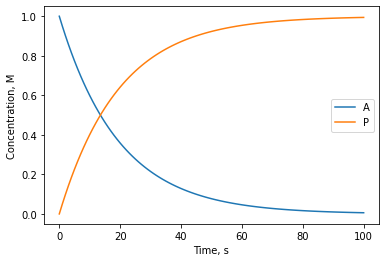

In [6]:
plt.plot(time, A_conc, label='A')
plt.plot(time, P_conc, label='P')
plt.xlabel('Time, s')
plt.ylabel('Concentration, M')
plt.legend()

In [7]:
t = np.arange(0,100, 10)
A_theor = 1.0*np.exp(-k*t)
P_theor = np.ones(10) - A_theor

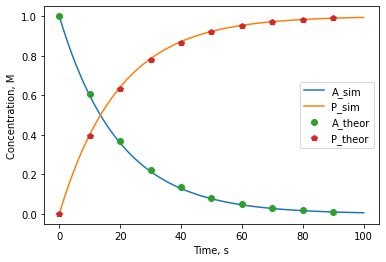

In [8]:
plt.plot(time, A_conc, '-', label='A_sim')
plt.plot(time, P_conc, '-', label='P_sim')
plt.xlabel('Time, s')
plt.ylabel('Concentration, M')

plt.plot(t, A_theor, 'o', label='A_theor')
plt.plot(t, P_theor, 'p', label='P_theor')

plt.legend()

### 9.1.3 Multistep Stepwise Chemical Kinetics

In [9]:
A_conc, B_conc, I_conc, P_conc = [], [], [], []
A, B, I, P = 1.0, 0.6, 0.0, 0.0  # initial conc, M
k1, k2, kr1, kr2 = 0.091, 0.1, 0.03, 0.01 # rate const
length = 200

for sec in range(length):
    A_conc.append(A)
    I_conc.append(I)
    B_conc.append(B)
    P_conc.append(P)
    rate_1 = k1 * A
    rate_r1 = kr1 * I
    rate_2 = k2 * B * I
    rate_r2 = kr2 * P
    A = A - rate_1 + rate_r1
    I = I + rate_1 - rate_2 - rate_r1 + rate_r2
    B = B - rate_2 + rate_r2
    P = P + rate_2 - rate_r2

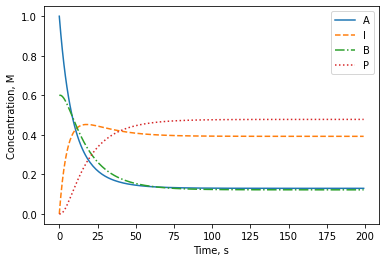

In [10]:
plt.plot(range(length), A_conc, label='A', ls='-')
plt.plot(range(length), I_conc, label='I', ls='--')
plt.plot(range(length), B_conc, label='B', ls='-.')
plt.plot(range(length), P_conc, label='P', ls=':')
plt.xlabel('Time, s')
plt.ylabel('Concentration, M')
plt.legend()

### 9.1.4 Chemical Kinetics and ODEINT

In [11]:
k1, kr1, k2 = 0.2, 0.6, 0.3
A0, B0, P0 = 1.0, 0.0, 0.0
t = np.linspace(0, 50, 50)

# define diff equation as Python function
def rates(conc, t):
    A, B, P = conc
    dAdt = -k1 * A + kr1 * B
    dBdt = k1 * A - k2 * B - kr1 * B
    dPdt = k2 * B
    
    return dAdt, dBdt, dPdt

In [12]:
A_t, B_t, P_t = scipy.integrate.odeint(rates, (A0, B0, P0),t).T

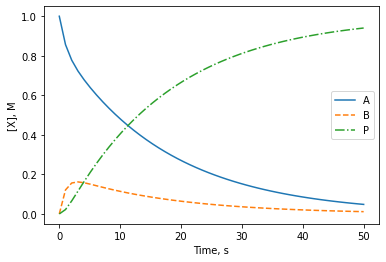

In [13]:
plt.plot(t, A_t, '-', label='A')
plt.plot(t, B_t, '--', label='B')
plt.plot(t, P_t, '-.',label='P')
plt.xlabel('Time, s')
plt.ylabel('[X], M')
plt.legend()

## 9.2 Stochastic Simulations
### 9.2.1 Radioactive Decay

In [14]:
starting_atoms = 1000
length = 10000  # length of simulation
num_atoms = starting_atoms
record = []
for x in range(length):
    record.append(num_atoms)
    # "rolls" dice and tallies up number of zeros
    rolls = np.random.binomial(1, p=0.001, size=num_atoms)
    decayed_count = np.sum(rolls)
    # deduct decayed nuclei from the total
    num_atoms -= decayed_count
record = np.array(record)

Text(0, 0.5, 'Atoms Remaining')

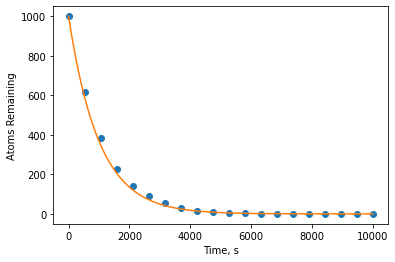

In [15]:
# plot of simulation
step = np.linspace(0, length, 20)
plt.plot(step, record[::500], 'o', label='Simulation Results')
# plot of theoretical rate law
t = np.linspace(0, length, 100)
plt.plot(t, starting_atoms*np.exp(-1/1000 * t), label='Theoretical Model')
plt.xlabel('Time, s')
plt.ylabel('Atoms Remaining')

### 9.2.2 Confidence Intervals

In [16]:
trials = 100000
N = 20
t = 2.09
true = 6.2  # true value
# list contain a one for each time true inside 95% CI
in_interval = []

for trial in range(trials):
    # create synthetic data
    error = np.random.rand(N)
    data = np.ones(N) * true + (error - 0.5)
    # calculate the 95% CI
    avg = np.mean(data)
    CI_95 = t * np.std(data, ddof=1) / np.sqrt(N)
    lower = avg - CI_95
    upper = avg + CI_95
    # determine if true values is inside 95% CI
    if lower <= true <= upper:
        in_interval.append(1)

In [17]:
100 * np.sum(in_interval) / trials

94.846

### 9.2.3 Random Flight Polymer

In [18]:
segments = 3000
coords = [[0,0]]
for step in range(segments):
    x = coords[step][0] + 2 * (np.random.rand() - 0.5)
    y = coords[step][1] + 2 * (np.random.rand() - 0.5)
    coords.append([x, y])
coords = np.array(coords)

Text(0, 0.5, 'Position(y), au')

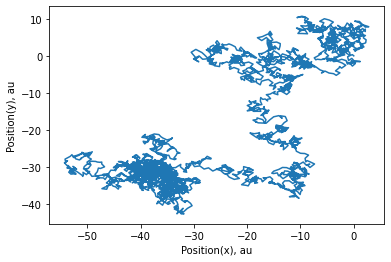

In [19]:
plt.plot(coords[:,0], coords[:,1])
plt.xlabel('Position(x), au')
plt.ylabel('Position(y), au')

## Exercises
### Kinetic Simulations

1. Using `scipy.integrate.odeint()` and a differential equation, plot the concentration of starting material A with respect to time for a third-order reaction.

2. Create a simulation of the following single-step reaction and overlay it with the appropriate integrated rate law. The rate constant is 0.28 M$^{-1}$s$^{-1}$. Feel free to start with code from this chapter and modify it as needed.

$$ 2A \rightarrow P $$

3. Plot the concentrations of A, B, C, and P with respect to time for the following three-step, non-reversible mechanism.


$$ A \rightarrow B \rightarrow C \rightarrow P  $$

The initial concentrations and rate constants are in the table below.

| Step | Specie | [Specie]0, M | Rate Constant, s$^-1$ |
| :--: | :---:  |  :---:       | :-----:               |
| 1  |  A | 1.50 | 0.8  |
| 2 | B | 0.00 | 0.4 |
| 3 | C | 0.00 | 0.3 |
| – | P | 0.00 | – |


4. Simulate the following chemical equilibrium where the forward rate is described by Rate$_f$ = (1.3 × 10$^{-2}$ M$^{-1}$s$^{-1}$)[A]$^2$ and the reverse rate is described by Rate$_r$ = (6.2 × 10$^{-3}$ s$^{-1}$)[B].

$$ 2A \leftrightarrow B $$

Use a `for` loop to simulate each second of reaction by calculating the rates and increasing/decreasing each concentration appropriately. Record the concentrations in lists and plot the results. Start with 2.20 M of A and 1.72 M B and run the simulation for at least 200 seconds. Notice that the rates are in M/s.

5. In section 9.1.3, a two-step, reversible reaction is simulated. If the rate constant k$_{r1}$ is decreased to 0.01 s$^{-1}$, what effect on the reaction do you anticipate? Simulate this to see if your prediction is correct.

6. Simulate two competing, first-order reactions of starting material A forming product P$_1$ and P$_2$ and plot the resulting concentrations of both products versus time. Use k$_1$ = 0.02 M/s and k$_2$ = 0.04 M/s and start with 2.00 M A. What do you predict the plot of concentration versus time to look like and the ratio of products to be? Does your simulation agree?


### Polymer Simulations

7. Polymers that consist of two or more different monomers are known as copolymers. Simulate an addition copolymer consisting of two monomers: ethylene (28.06 g/mol) and styrene (104.16 g/mol) with a fixed length of a thousand units. Given the molecular weights of the two monomers above, calculate the weights for a thousand simulated polymer strands and generate a histograms of the frequency versus weight.

Hint: try using the `np.random.binomial()` function with `p=0.5` and treat a zero as one monomer and a one is the other.

8. Block copolymers are polymers where multiple monomer types are clustered along the polymer chain instead of being randomly dispersed. These clusters are called blocks which may be of random lengths as the polymer switches between monomer types. An example is shown below.

$$ -A-A-A-A-A-A-A-B-B-B-B-B-B-A-A-A-A-B-B-B-A-A-A-A-A- $$

Simulate a block copolymer consisting of two monomers with a total length of a hundred monomer units.

Hint: Append monomers (0 or 1) to a list inside a `for` loop, and use a function from `np.random.binomial()` to decide when to toggle between monomers types. Use `mono = 1 - mono` to make the switch.

9. The random flight polymer simulation presented in section 9.2.3 uses a `for` loop. As discussed in chapter 4, one of the virtues of NumPy is that it often avoids the computationally inefficient `for` loops. Below is the same simulation written in a single line of code leveraging the power of NumPy arrays. Briefly explain what it is doing and why it works.

~~~python
loc = np.cumsum(np.random.randint(-1, high=2, size=(3000,2)), axis=0)
~~~

10. Proteins are nature polymers consisting of twenty common monomers called amino acids. Simulate a random protein strand of a thousand units long using the `np.random.randint()` function and a Python dictionary containing the single letter amino acid codes.

### Other Simulations

11. Confidence intervals

a) Convert the code for calculating a 95% confidence interval in section 9.2.2 to a Python function that accepts a number of samples as the one argument and returns the percentage of the time the true value is inside the confidence interval. You will need to look up t values and generate a dictionary that converts degrees of freedom (N) to t values.

b) Using a `for` loop, calculate the percentage of the time the true value is in the 95% confidence interval for each of the sample sizes in the above dictionary and plot the results. Describe the trend.

12. Simulate the diffusion of molecules along a single axis. Start all molecules at zero, and for each step of the simulation, add a random number, positive or negative, to each value in the array. Plot the results in a histogram.

13. Using the function from 9.1.1, simulate the splitting pattern for the tertiary proton in isopropyl alcohol ((CH$_3$)$_2$CHOH). In CDCl$_3$, this proton is observed at 3.82 ppm with a coupling constant of 6 Hz. Assume no coupling with the hydroxyl proton is observed.